<div style="background-color:#E0F2F7;padding:10px;border-radius:5px;border:2px solid #66D9EF; text-align:center;">
    <h2 style="color:#2E8697;">BAN 210: Workshop 3</h2>
</div>

In [28]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Part I: Simple Linear Regression</h1>

In [30]:
# Import the data
Advertising =pd.read_csv("Advertising.csv")
Advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [31]:
# Explore the data: data type, null count
Advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [32]:
# Explore the data: average, min, max, statistics number
Advertising.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [33]:
Advertising.drop('Unnamed: 0', axis=1, inplace=True)
Advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Data Cleaning

In [35]:
# Checking for Null Values: There is no null here in dataset
Advertising.isnull().sum()*100/Advertising.shape[0]

TV           0.0
radio        0.0
newspaper    0.0
sales        0.0
dtype: float64

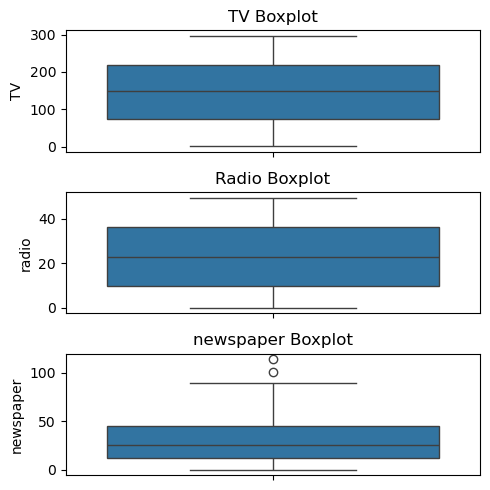

In [36]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(Advertising['TV'], ax = axs[0])
plt1.set_title('TV Boxplot')
plt2 = sns.boxplot(Advertising['radio'], ax = axs[1])
plt2.set_title('Radio Boxplot')
plt3 = sns.boxplot(Advertising['newspaper'], ax = axs[2])
plt3.set_title('newspaper Boxplot')
plt.tight_layout()

plt.show()

# There are no considerable outliers present in the data

Correlation between TV and sales: 0.7822244248616061
Correlation between radio and sales: 0.5762225745710551
Correlation between newspaper and sales: 0.22829902637616528


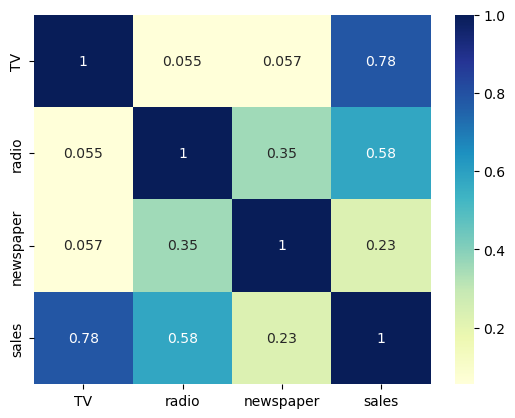

In [38]:
#Checking the correlation between variables

correlation_tv = Advertising['TV'].corr(Advertising['sales'])
correlation_radio = Advertising['radio'].corr(Advertising['sales'])
correlation_newspaper = Advertising['newspaper'].corr(Advertising['sales'])

print(f'Correlation between TV and sales: {correlation_tv}')
print(f'Correlation between radio and sales: {correlation_radio}')
print(f'Correlation between newspaper and sales: {correlation_newspaper}')

sns.heatmap(Advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

# TV has the strongest correlation to sales and it is the best choice as feature variable for the simple linear regression.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Q1 : Is the distribution of X suitable for a linear regression model? (Here: Variable X is "TV")</h1>

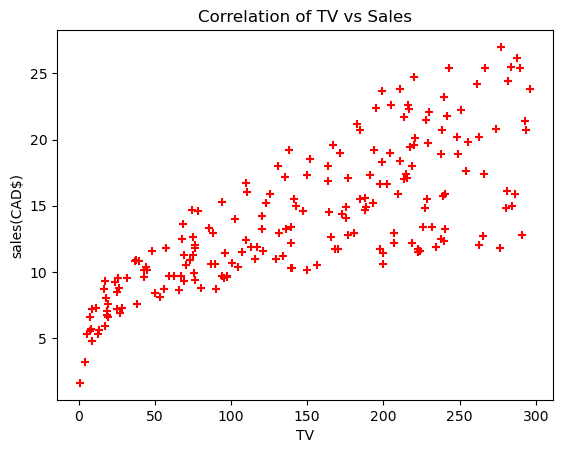

In [41]:
# Checking the correlation using scatterplot

%matplotlib inline
plt.title('Correlation of TV vs Sales')
plt.xlabel('TV')
plt.ylabel('sales(CAD$)')
plt.scatter(Advertising.TV,Advertising.sales, color='red', marker='+')

# Display the plot
plt.show()

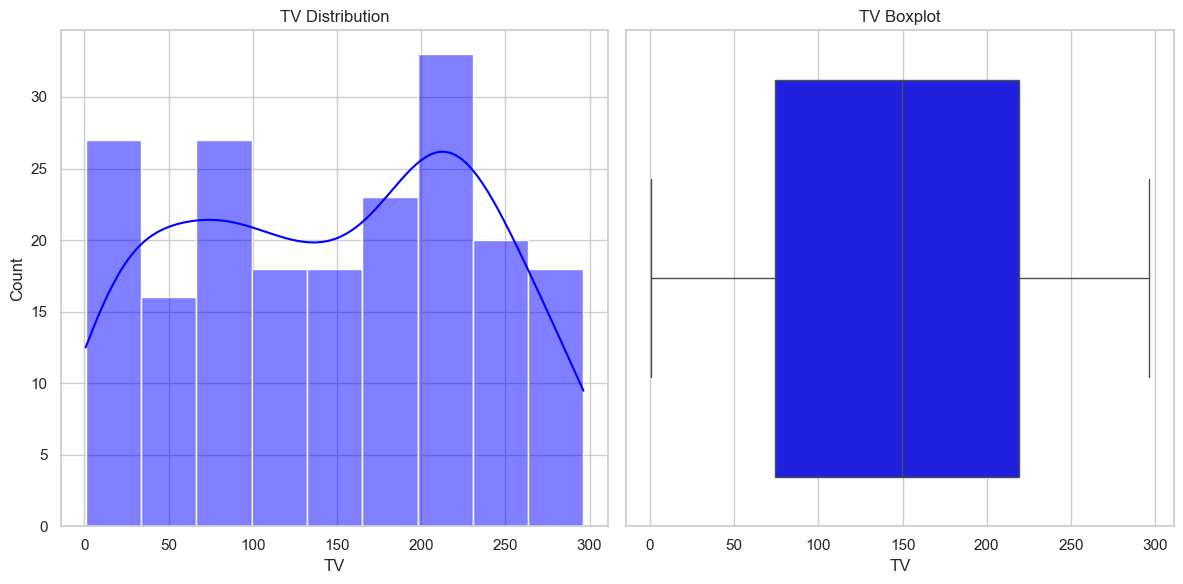

In [42]:
# create frequency plot for X
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a subplot for the histogram and boxplot of TV
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# TV Histogram with KDE
sns.histplot(Advertising['TV'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('TV Distribution')

# Boxplot for TV
sns.boxplot(x=Advertising['TV'], ax=axes[1], color='blue')
axes[1].set_title('TV Boxplot')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


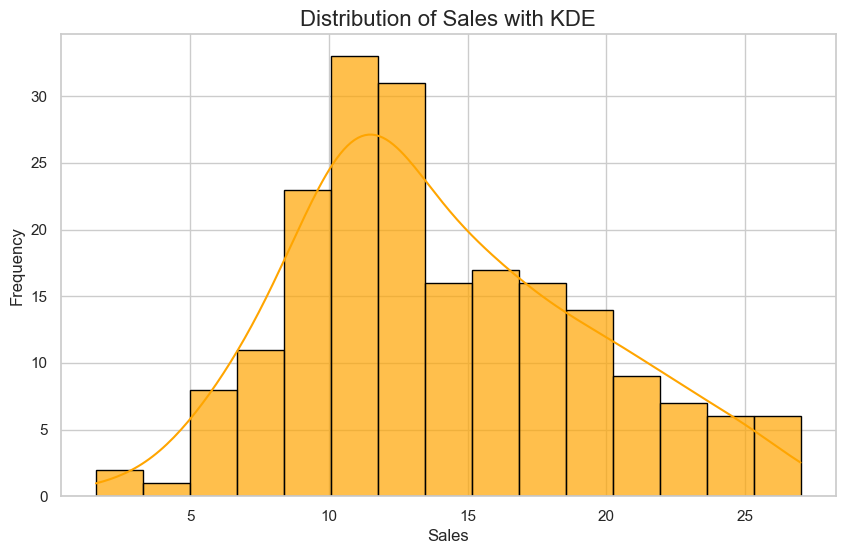

In [43]:
# create frequency plot for Y (sales)
# TV Histogram with KDE

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
# Create histogram with KDE
sns.histplot(Advertising['sales'], bins=15, kde=True, color='orange', edgecolor='black', alpha=0.7)
# Add titles and labels
plt.title('Distribution of Sales with KDE', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show() #right skewed distribution

# We chose TV as the variable for linear regression since it shows the strongest correlation to sales, which makes it the most important predictor in our dataset.
The distribution of TV is right-skewed which may not meet the ideal normality assumption for linear regression. Hence, we’re going to do a log transformation on TV to help stabilize the variance and make the connection between TV and sales more linear. The log transformation is really useful because it helps the model satisfy the assumptions of linear regression, which in turn makes the results more accurate and easier to understand.

In [45]:
# Apply log transformation to the 'TV' column
Advertising['log_TV'] = np.log(Advertising['TV'] + 1)  # Adding 1 to handle zeros in the data

# Checking  the first few rows to confirm the transformation
Advertising[['TV', 'log_TV']].head()

,TV,log_TV
0,230.1,5.442851
1,44.5,3.817712
2,17.2,2.901422
3,151.5,5.027165
4,180.8,5.202907


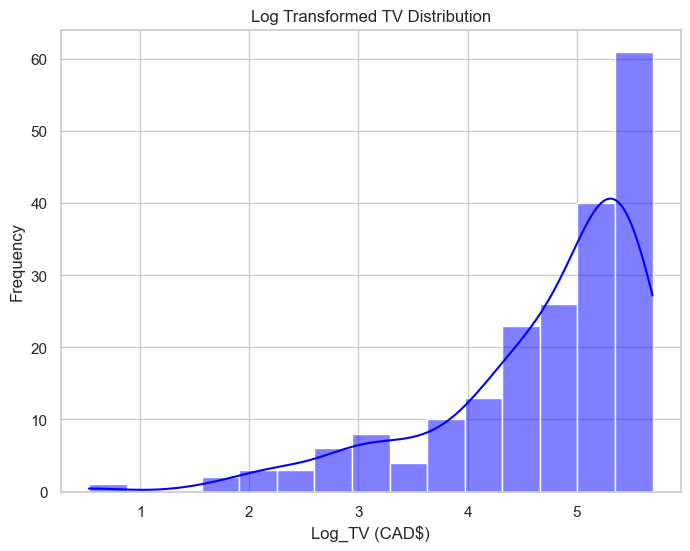

In [46]:
# Creating the histogram of the log-transformed TV data
plt.figure(figsize=(8, 6))
sns.histplot(Advertising['log_TV'], kde=True, color='blue')
plt.title('Log Transformed TV Distribution')
plt.xlabel('Log_TV (CAD$)')
plt.ylabel('Frequency')
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Q2: What is the coefficient for LOG_X?
Q3: What is the intercept? </h1>

# Model Building

Performing Simple Linear Regression

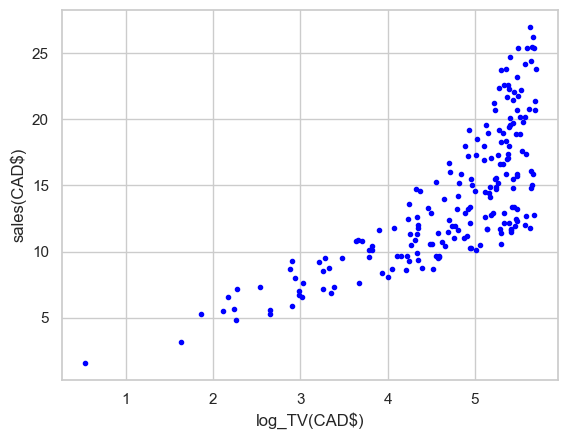

In [49]:
# Performing the Scatterplot for Log_TV vs. Sales

%matplotlib inline
plt.xlabel('log_TV(CAD$)')
plt.ylabel('sales(CAD$)')
plt.scatter(Advertising.log_TV,Advertising.sales, color='blue', marker='.')

# Display the scatterplot
plt.show()

In [50]:
# X as the independent variable (log_TV) and Y (Sales) as  dependent variable
X = Advertising[['log_TV']]
Y = Advertising['sales']

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

# Get the intercept and coefficient
intercept = model.intercept_
coefficient = model.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Coefficient for Log_X (log_TV): {coefficient:.4f}")

Intercept: -5.2734
Coefficient for Log_X (log_TV): 4.1117


Equation of linear regression
y=c+m1x1+m2x2+...+mnxn

y  is the response
c  is the intercept
m1  is the coefficient for the first feature
mn  is the coefficient for the nth feature
In our case:

y=c+m1×Log_TV

The  m  values are called the model coefficients or model parameters.

## Linear Equation Model:
## Sales = -5.273 + 4.11*Log_TV

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Part II: Multivariate Regression</h1>

# Step 2:

In [55]:
# Applying  Data Transformation to all predictors (Log(X) and Norm of X)

# Apply log transformation to the predictors (TV, Radio, Newspaper)
Advertising['log_TV'] = np.log(Advertising['TV'] + 1)
Advertising['log_radio'] = np.log(Advertising['radio'] + 1)
Advertising['log_newspaper'] = np.log(Advertising['newspaper'] + 1)

# Normalizing the transformed predictors
scaler = StandardScaler()
Advertising[['log_TV', 'log_radio', 'log_newspaper']] = scaler.fit_transform(Advertising[['log_TV', 'log_radio', 'log_newspaper']])

# Check the first few rows to confirm the transformation
Advertising[[ 'log_TV', 'log_radio', 'log_newspaper']].head()

,log_TV,log_radio,log_newspaper
0,0.781107,0.850789,1.270548
1,-0.911701,0.892779,0.784008
2,-1.866146,1.060674,1.272195
3,0.348112,0.946397,1.079221
4,0.531172,-0.466897,1.077274


# Step 3:

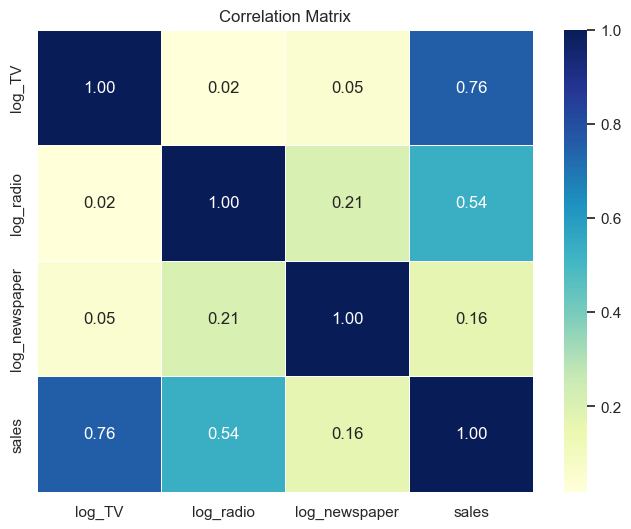

In [57]:
# Correlation Matrix
corr_matrix = Advertising[['log_TV', 'log_radio', 'log_newspaper', 'sales']].corr()

# Heatmap Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

The correlation heatmap indicates that log_TV exhibits the most positive association with sales. This indicates that television advertisements exert the most significant influence on sales. A fairly significant correlation exists between log_radio and sales, indicating that radio advertising influences sales, albeit to a lesser extent than television advertising. The weakest positive correlation is shown in log_newspaper, indicating that newspaper advertisements exert minimal influence on sales. Overall, these findings indicate that television advertisements exert the greatest influence on sales. Radio and newspaper advertisements yield modest yet favorable impacts.

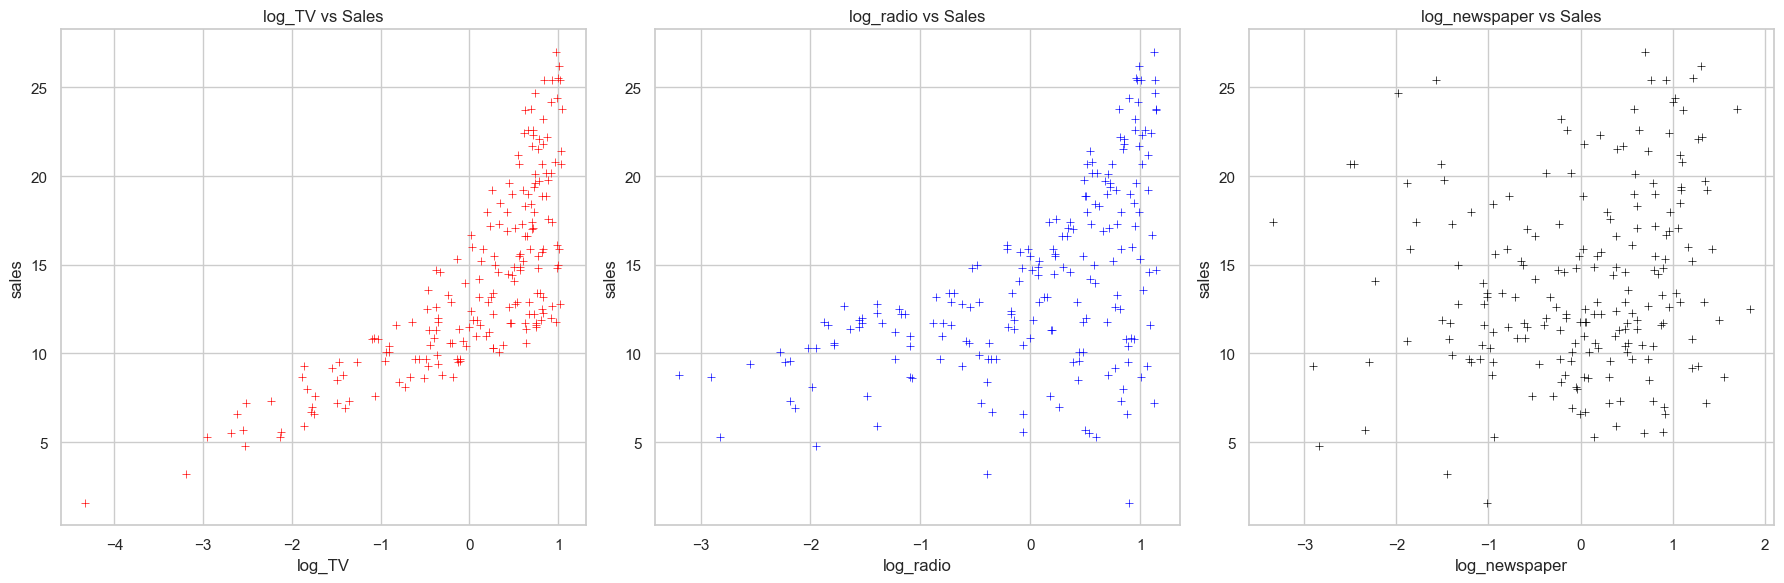

In [59]:
# Scatter plots for all predictors vs Sales as Target Variable
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot; log_TV vs sales
sns.scatterplot(x=Advertising['log_TV'], y=Advertising['sales'], ax=axes[0], color='red', marker='+')
axes[0].set_title('log_TV vs Sales')

# Scatter plot for log_radio vs sales
sns.scatterplot(x=Advertising['log_radio'], y=Advertising['sales'], ax=axes[1], color='blue', marker='+')
axes[1].set_title('log_radio vs Sales')

# Scatter plot for log_newspaper vs sales
sns.scatterplot(x=Advertising['log_newspaper'], y=Advertising['sales'], ax=axes[2], color='black', marker='+')
axes[2].set_title('log_newspaper vs Sales')

plt.tight_layout()
plt.show()

# Model Building
Multivariate Regression Model

In [61]:
# X as the independent variable (log_TV) and Y (Sales) as  dependent variable
X1 = Advertising[['log_TV', 'log_radio', 'log_newspaper']]
Y1 = Advertising['sales']

# Initialize the linear regression model
model_mrm = LinearRegression()

# Fit the model to the data
model_mrm.fit(X1, Y1)

# Get the intercept and coefficient
intercept = model_mrm.intercept_
coefficient = model_mrm.coef_

print(f"Intercept: {intercept:.4f}")
print(f"Coefficient for Log_X1 (log_TV): {coefficient[0]:.4f}")
print(f"Coefficient for Log_X2 (log_radio): {coefficient[1]:.4f}")
print(f"Coefficient for Log_X3 (log_newspaper): {coefficient[2]:.4f}")

Intercept: 14.0225
Coefficient for Log_X1 (log_TV): 3.8915
Coefficient for Log_X2 (log_radio): 2.6953
Coefficient for Log_X3 (log_newspaper): 0.1000


## Regression Equation Model:
## Sales = 14.0225 + 3.8915*Log_TV + 2.6953*Log_radio + 0.1000*Log_newspaper

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Part III: Regression assessment </h1>

In [64]:
# Predicting using the simple linear regression model
simple_model = LinearRegression()
simple_model.fit(Advertising[['log_TV']], Advertising['sales'])
simple_y_pred = simple_model.predict(Advertising[['log_TV']])

# Predicting using the multivariate regression model
mrm_y_pred = model_mrm.predict(X1)

# Computing the R-squared and MSE for both models
simple_r2 = r2_score(Y, simple_y_pred)
simple_mse = mean_squared_error(Y1, simple_y_pred)

mrm_r2 = r2_score(Y, mrm_y_pred)
mrm_mse = mean_squared_error(Y1, mrm_y_pred)

# Displaying the results

Table = pd.DataFrame({
    'Model': ['Simple Linear Regression', 'Multivariate Linear Regression'],
    'R-squared': [simple_r2, mrm_r2],
    'Mean Squared Error': [simple_mse, mrm_mse]
})

# Print the table
Table

,Model,R-squared,Mean Squared Error
0,Simple Linear Regression,0.575251,11.504629
1,Multivariate Linear Regression,0.847862,4.120757


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Q4: What do the above numbers mean? Is it fair to compare them if they are using
different data?  </h1>

The Multivariate Linear Regression model exhibits greater performance, evidenced by a higher R-squared and a lower Mean Squared Error (MSE) relative to the Simple Linear Regression model. This signifies that the multivariate model accounts for greater volatility in the data and yields more precise predictions, indicating a superior fit.

It is essential to recognize that a comparison of the two models is fair only if they are assessed using the identical dataset. To facilitate a valid comparison, both models must be evaluated under identical settings. Assessing models across different datasets may result in skewed comparisons and erroneous results.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Q5: Does a better fit on training data result in a better fit on validation or test data?  </h1>

An improved fit on the training data does not always guarantee a superior fit on validation or test data. A model may overfit the training data, resulting in inadequate generalization to unseen data. Evaluating models using test data is crucial for determining how applicable they are.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Part IV: Time Series </h1>

In [70]:
# Import the data
retail = pd.read_csv("retail_sales.csv")
retail.head()

FileNotFoundError: [Errno 2] No such file or directory: 'retail_sales.csv'

In [ ]:
#Summarize and visualize the data
retail.info()         # Column types & non-null counts

In [ ]:
retail.describe()     # Summary stats for numeric columns

In [ ]:
retail.isnull().sum()  # Missing values

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Q6: How many products are in this dataset? Which product has the highest frequency?  </h1>

In [ ]:
# Count the frequency of each product in the 'kind_of_business' column
product_counts = retail['kind_of_business'].value_counts()

# Total number of unique products
product_totals = product_counts.shape[0]

# Product with the highest frequency and its count
product_most_frequent = product_counts.idxmax()
count_most_frequent = product_counts.max()

# Print the results
print(f"Amount of Products in the Dataset: {product_totals}")
print(f"Product with the highest frequency: {product_most_frequent} ({count_most_frequent} occurrences)")

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Q7: </h1>
    <p>Looking at Time Series Summary graphs for each Business, how are the sales distributed
among each Business value? What is the range of values assigned to Time Series ID? Based on
the possible values for the three Business ID variables, is this what you expected?
</p>

In [ ]:
# Generate Time Series Summary graphs for each Business
# Convert 'month' column to datetime format
retail['month'] = pd.to_datetime(retail['month'])

# Get unique businesses
unique_businesses = retail['kind_of_business'].unique()

# Plot for each business
plt.figure(figsize=(12, 6))
for business in unique_businesses:
    business_data = retail[retail['kind_of_business'] == business]
    plt.plot(business_data['month'], business_data['value'], label=business)

plt.title('Time Series Summary for Each Business')
plt.xlabel('Month')
plt.ylabel('Sales Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot

plt.show()

In [ ]:
# Create a faceted grid of time series plots
g = sns.FacetGrid(retail, col="kind_of_business", col_wrap=4, height=3, aspect=1.5, sharey=False)
g.map(sns.lineplot, "month", "value")
g.set_titles("{col_name}")
g.set_axis_labels("Month", "Sales Value")
g.tight_layout()
plt.show()

## Sales are distributed differently amongst different business values.
Some business lines show more peaks and dips which can mean more variability in sales which can be attributed to factors such as seasonality. For example, "automobile and other motor vehicle dealers". This differs from lines that are more flat indiciating more stable sales as seen in the graph for "All other home furnishing stores".
## Also, the range of sales also differs between business values. Some business values have a maximum of 2000 dollars in sales values.
For example "floor covering stores". Whereas, the business of "food services and drinking places" has sales up to 100,000 dollars.

In [ ]:
# What is the range of values assigned to Time Series ID? Based on the possible values for the three Business ID variables, is this what you expected?
retail.columns

In [ ]:
from datetime import datetime

start_date = retail['month'].min()
end_date = retail['month'].max()
print(f"The earliest date (start date) in the dataset is: {start_date.strftime('%Y-%m-%d')}")
print(f"The latest date (end date) in the dataset is: {end_date.strftime('%Y-%m-%d')}")

number_of_years = (end_date - start_date).days / 365.25 # approximation using 365.25 days per year to account for leap years
print(f"The dataset covers a period of approximately {number_of_years:.2f} years.")

In [ ]:
# Clean 'naics_code': remove NaN, convert to string, and strip whitespace
clean_codes = retail['naics_code'].dropna().astype(str).str.strip()

# Get unique and sorted Time Series IDs
unique_codes = clean_codes.unique()
sorted_codes = sorted(unique_codes)

# Print results
print("Number of unique Time Series IDs (naics_code):", len(unique_codes))
print("Sorted Time Series IDs:", sorted_codes)

The range of values assigned to Time Series ID consists of 60 unique IDs. It ranged from short IDs such as "443" to longer IDs including "44112" and also includes "no code" as an ID.
Based on the three Business ID variables this is mostly what the group expected. Each naics_code is directly associated with a kind_of_business value. The group expected numeric codes as seen in the naics_code but did not expect to see "no code" so that came as a surprise.

naics_code: The presence of detailed NAICS codes, including various levels of granularity (e.g., '44819', '451211', 'no code'), is expected in a comprehensive retail sales dataset. This allows for categorization and analysis at different industry levels.

kind_of_business: The detailed textual descriptions for kind_of_business are also expected. They provide a human-readable understanding of the business types, complementing the numerical NAICS codes. The variety of business types, from broad categories like 'Retail sales, total' to specific ones like 'Book stores' or 'Pharmacies and drug stores', reflects the diverse nature of the retail sector.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Q8: </h1>
    <p> Run your code again and see the results. Paste the Target Time Series Plot (or Multiple Time
Series Comparison Plot). How many TSIDs are assigned now?
</p>

In [ ]:
# Step 2: Remove naics_code, kind_of_business
retail1 = retail.drop(['naics_code', 'kind_of_business'], axis=1)
retail1.head()

In [ ]:
# Run the code again: Generate Time Series Summary
plt.figure(figsize=(120, 60))
plt.plot(retail1['month'], retail1['value'], marker='o', linestyle='-', color='skyblue')

plt.title('Time Series Summary')
plt.xlabel('Month')
plt.ylabel('Sales Value')

plt.grid(True)
plt.tight_layout()
plt.show()
print(f"Number of TSIDs: {len(retail1.month.unique())}")

There are 396 Time Series IDs are assigned, representing the dinctinct reported months with their business values, after removing naics_code and kind_of_business.

In [ ]:
pip install tslearn

In [ ]:
# Convert month to datetime for sorting
retail1['month'] = pd.to_datetime(retail1['month'])

# Group values by month
grouped = retail1.groupby('month')['value'].apply(list)

# Convert to DataFrame where each column is a month
retail1_transposed = pd.DataFrame(dict(grouped))

# Sort columns by month
retail1_transposed = retail1_transposed.sort_index(axis=1)

# Sort value ascending
retail1_transposed = retail1_transposed.fillna(0)
retail1_transposed = retail1_transposed.apply(sorted)

# Format column names as strings
retail1_transposed.columns = retail1_transposed.columns.strftime('%Y-%m-%d')
retail1_transposed.tail()

In [ ]:
from tslearn.metrics import dtw
# Define Sales 1 series
sales_1 = retail1_transposed.iloc[:, 0]  # Assuming 'Sales 1' is the first column
print(f"Sales 1 date: {sales_1.name}")

# Compute DTW distance for all series (excluding itself)
similarity_scores = {}
for col in retail1_transposed.columns:
    if col == retail1_transposed.columns[0]:
        continue
    series = retail1_transposed[col].values
    # Compute the DTW distance
    score = dtw(sales_1, series)
    similarity_scores[col] = score

if not similarity_scores:
    raise ValueError("No comparable series found to compare against 'Sales 1'.")

most_similar = min(similarity_scores, key=similarity_scores.get)
least_similar = max(similarity_scores, key=similarity_scores.get)

print(f"Most similar to Sales 1: {most_similar}")
print(f"Least similar to Sales 1: {least_similar}")

The sales data for January 1, 1992, represented as "Sales 1," exhibits varying degrees of similarity when compared to other time periods, as determined by Dynamic Time Warping (DTW) distance. Notably, the sales pattern on February 1, 1992, is found to be the most similar to "Sales 1," suggesting that early-year sales trends in 1992 shared significant alignment. Conversely, the sales data from December 1, 2024, stands out as the least similar. This stark dissimilarity over an extended period—more than three decades—highlights potential long-term shifts in sales patterns, seasonal influences, market dynamics, or underlying economic conditions that have diverged significantly from the early 1992 baseline.

In [ ]:
#Step 4: Apply an “TS Exponential Smoothing” to all “Time Series” and forecast all-time series.
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Define forecast horizon (e.g., 12 periods into the future)
forecast_steps = 12

# Create an empty dictionary to store forecasts for every series
forecasts = {}

# Loop through each time series (each column) in the DataFrame
for col in retail1_transposed.columns:
    series = retail1_transposed[col]

    # Try to fit a seasonal model (if you expect seasonality, e.g., monthly with seasonal_periods=12)
    try:
        model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=12)
        fit = model.fit(optimized=True)
    except Exception as e:
        print(f"Seasonal model failed for {col} due to: {e}. Trying non-seasonal model.")
        # Fallback to a non-seasonal model if fitting fails
        model = ExponentialSmoothing(series, trend='add', seasonal=None)
        fit = model.fit(optimized=True)

    # Forecast the future values
    forecast = fit.forecast(steps=forecast_steps)
    forecasts[col] = forecast

    # Plot the original series and the forecast
    plt.figure(figsize=(10, 4))
    plt.plot(series.index, series, label='Original', marker='o')
    plt.plot(forecast.index, forecast, label='Forecast', marker='x')
    plt.title(f"Exponential Smoothing Forecast for {col}")
    plt.xlabel("Time")
    plt.ylabel(col)
    plt.legend()
    plt.show()

In [ ]:
# Display the forecasted values for each series
for series_name, forecast_values in forecasts.items():
    print(f"Last forecast value for {series_name}: {forecast_values.iloc[-1]}\n")

What I understand from the required table:

The table is comparing the forecast performance of different time series (TS_1, TS_3, etc.) after applying the TS Exponential Smoothing model. For the total sum of squares metric:
TS_3 is deemed the “best” because it has the lowest error (1.635e12), meaning its forecasts align more closely with the observed data.
TS_1 is considered the “worst” with a much higher error (7.076e13).

*Total sum of squares:

Best Fit: The table shows that for this metric, the best fit is series _TS_3 with a value of 1.635e12.
This suggests that _TS_3, when forecasted using TS Exponential Smoothing, has the lowest overall variability or error as measured by the residual sum of squares. Essentially, the forecasts for _TS_3 are relatively close to the actual data.

Worst Fit: The worst fit is series _TS_1 with a value of 7.076e13.
This much larger value indicates that the model’s predictions for _TS_1 deviate significantly from the observed values, leading to a poorer fit


## Group work
We, Jamaica Vee Buduan, Jenelle Guerrero Martinez, Joshua Kevin Jonathan, Julie Pham, declare that the attached assignment is our own work
in accordance with the Seneca Academic Policy. We have not copied any part of this
assignment, manually or electronically, from any other source including web sites, unless
specified as references. We have not distributed our work to other students

1. Jamaica: Part I, II, III
2. Jenelle: Part IV (question 6,7)
3. Jonathan: Part IV
4. Julie: Part IV (question 8), combine everyone works